In [1]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import cv2

In [7]:
df = pd.read_csv('/home/emanuele/LabelAnything/data/processed/df.csv')
df.head().sort_values(by='diagnosis', ascending=True)

,patient,image_path,mask_path,diagnosis
0,TCGA_CS_5397_20010315,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,0
1,TCGA_CS_5397_20010315,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,0
2,TCGA_CS_5397_20010315,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_F...,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_F...,0
3,TCGA_CS_5397_20010315,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_H...,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_H...,0
4,TCGA_CS_5397_20010315,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_C...,0


In [3]:
df.iloc[0,1]

'data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif'

In [10]:
image = cv2.imread('/home/emanuele/LabelAnything/data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5.tif') # color mode
mask = cv2.imread('/home/emanuele/LabelAnything/data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_mask.tif', 0) # grayscale mode

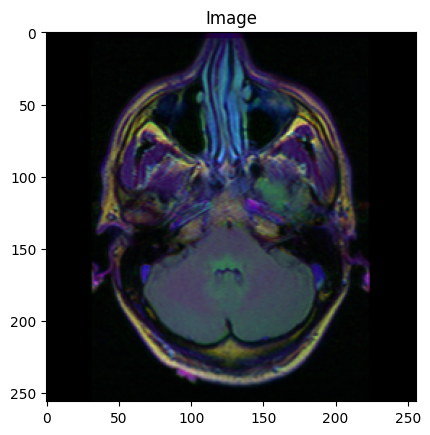

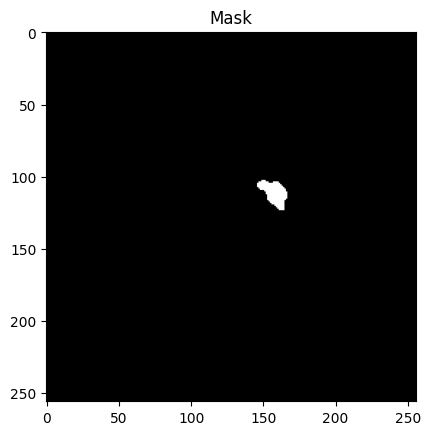

In [11]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
plt.title("Image")
plt.show()

# Display the mask
plt.imshow(mask, cmap="gray")  # Display in grayscale
plt.title("Mask")
plt.show()

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [13]:
class BrainMriDataset(Dataset):
    def __init__(self, df, transforms):

        self.df = pd.read_csv(df)
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = self.df.iloc[idx, 1]
        mask = self.df.iloc[idx, 2]

        if self.transforms is not None:
            image = self.transforms(image)
            mask = self.transforms(mask)
        return image, mask

        # unnormilize mask
        # mask = torch.clamp(mask.float(), min=0, max=1)
        # mask = torch.ceil(mask)

In [15]:
dataset = BrainMriDataset("/home/emanuele/LabelAnything/data/processed/df.csv", transforms=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [21]:
image, mask = next(iter(dataloader))

In [22]:
image, mask

(('data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6692_20020606/TCGA_FG_6692_20020606_10.tif',),
 ('data/raw/lgg-mri-segmentation/kaggle_3m/TCGA_FG_6692_20020606/TCGA_FG_6692_20020606_10_mask.tif',))